In [88]:
import sklearn
import numpy as np
import pandas as pd

In [89]:
data = pd.read_excel('time_series_375_prerpocess_en.xlsx')
data

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:45:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,NaN,2020-02-16 11:21:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,NaN,2020-02-16 12:04:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,NaN,2020-02-16 12:14:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,NaN,2020-02-16 14:11:00,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# parse the data to leave the most recent record for each patient.
for i in range(len(data)-1):
    if (np.isnan(data.loc[i+1, 'PATIENT_ID'])):
        data = data.drop(i)
data = data.sample(frac=1)
data.index = range(len(data))
data.fillna(-1, inplace=True)
print(data.shape)

(375, 81)


In [91]:
data = data.drop(['RE_DATE', 'Admission time', 'Discharge time', 'PATIENT_ID'], axis=1)
data

,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,65,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,68,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,58,1,1,-1.0,-1.0,-1.0,17.0,-1.0,-1.0,-1.0,...,-1.0,33.6,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,66,2,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,69,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,70,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
371,67,1,0,-1.0,-1.0,102.6,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,140.9,-1.0,-1.0,57.0,72.0,94.0
372,44,1,0,-1.0,-1.0,96.6,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,135.7,-1.0,-1.0,-1.0,-1.0,-1.0
373,82,2,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,4.0,-1.0,-1.0,-1.0


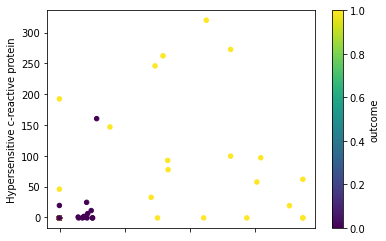

In [92]:
import matplotlib.pyplot as plt
fig = data.plot.scatter(x='Lactate dehydrogenase', y='Hypersensitive c-reactive protein', c='outcome', colormap='viridis')
plt.savefig('./draft/figure.pdf')

(-1.0, 1.0)

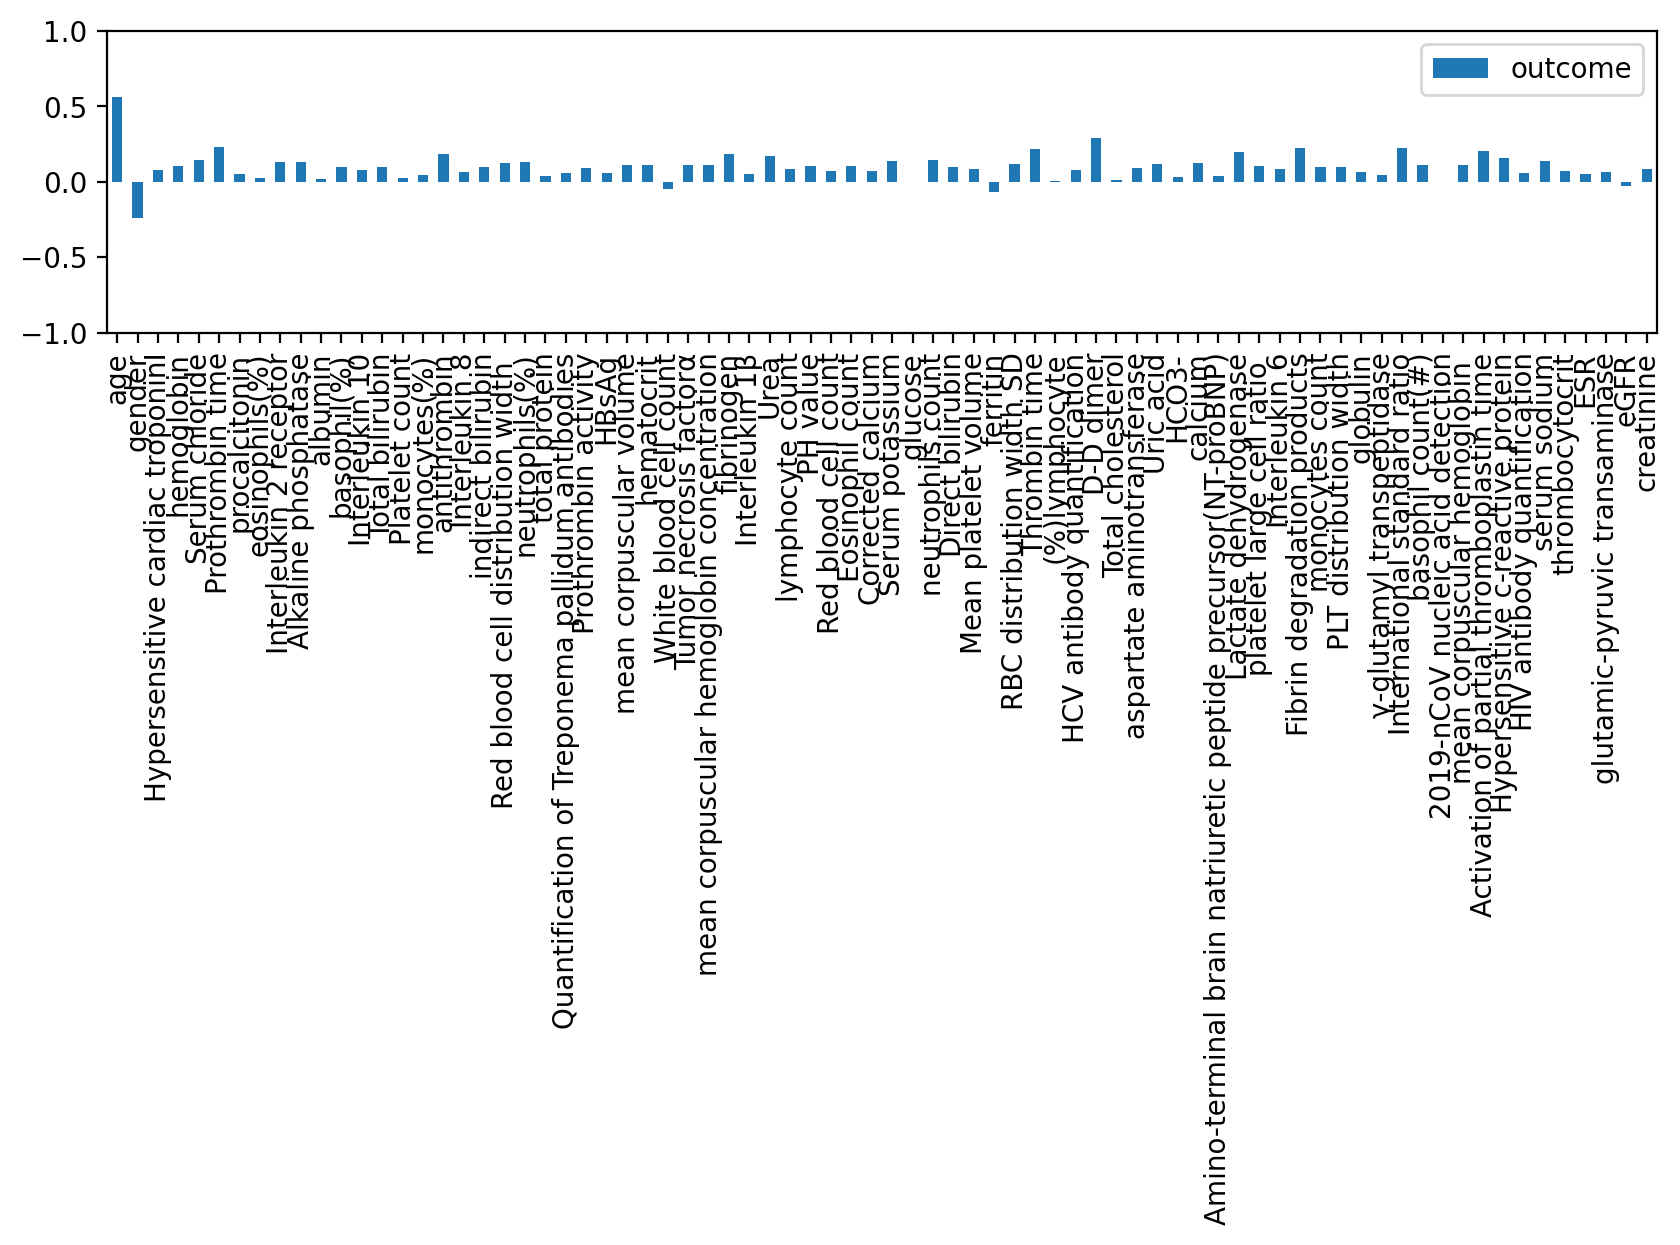

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data[data.columns[0:]].corr()['outcome'][:]
corr = corr.to_frame()
fig=plt.figure(figsize=([10,2]), dpi= 200, facecolor='w', edgecolor='k')
corr = corr.drop('outcome')
ax = plt.axes()
corr.plot(kind='bar', ax=ax)
ax.set_ylim([-1,1])

In [94]:
# kernel principal components analysis for dimensionality reduction. Let's aim for 1:10 ratio between features and samples
# 375 * 0.1 = 37.5 ≈ 37

from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=37, kernel='linear')
data_T = transformer.fit_transform(data.loc[:,data.columns != 'outcome'])
data_T = pd.DataFrame(data_T)
data_T.insert(0,'outcome',data.loc[:, 'outcome'])
data_T

,outcome,0,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
0,1,-557.287093,-85.302268,-100.317555,-75.604134,51.275751,-11.845855,-8.263629,3.398744,-3.136144,...,0.058729,-0.250330,-0.721588,-0.191768,0.196331,-0.321133,0.079343,-0.130528,0.293736,-0.716293
1,1,-557.286371,-85.300918,-100.305632,-75.597012,51.261700,-11.825849,-8.278560,3.347974,-3.163973,...,0.130613,-0.315029,-0.761762,-0.230036,0.225908,-0.297231,0.119126,-0.180133,0.297446,-0.724313
2,1,-557.313118,-85.401828,-100.799177,-76.762191,52.288428,-13.071322,-9.960662,3.243706,-4.963116,...,-0.908310,1.119457,0.141658,0.235606,-0.733425,-0.152404,-7.816667,0.599729,2.073057,-1.110844
3,0,-557.286848,-85.301841,-100.313567,-75.601860,51.271246,-11.839172,-8.268250,3.381686,-3.145467,...,0.082435,-0.278048,-0.729357,-0.205750,0.211129,-0.315657,0.103616,-0.128805,0.300211,-0.724494
4,1,-557.286144,-85.300521,-100.301918,-75.595282,51.257590,-11.819828,-8.284356,3.331135,-3.173926,...,0.161790,-0.346231,-0.778808,-0.246343,0.246821,-0.291496,0.141028,-0.206847,0.308976,-0.748304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1,-557.285889,-85.300018,-100.297683,-75.592263,51.252333,-11.812512,-8.288515,3.314128,-3.182526,...,0.178537,-0.358162,-0.788545,-0.255548,0.245626,-0.281297,0.145647,-0.213203,0.299920,-0.729659
371,0,-553.636599,-87.562053,-116.393283,364.957681,7.437915,146.572104,-10.657194,31.106019,-7.056040,...,12.583508,6.999863,1.948165,-1.224627,-4.526812,0.124955,0.277317,-0.061917,-3.284531,-2.461669
372,0,-557.188770,-85.378881,-101.524220,-54.083496,49.789575,8.408427,-9.215810,4.228388,-4.751178,...,1.158672,1.601915,0.512666,-4.083366,0.182850,-0.263045,-0.525447,0.388264,-2.878593,-2.337921
373,1,-557.283115,-85.295106,-100.252486,-75.570015,51.202202,-11.739250,-8.356123,3.114644,-3.297502,...,0.460279,-0.597807,-0.871465,-0.392036,0.351192,-0.160741,0.309093,-0.383740,0.296204,-0.709643


In [95]:
# let's try and try on the principal components
data = data.sample(frac=1)
split_index = round(len(data) * 0.70)
x_train = data.loc[:split_index, data.columns != 'outcome']
print(x_train.shape)
y_train = data.loc[:split_index, data.columns == 'outcome']
print(y_train.shape)
x_test = data.loc[split_index+1:, data.columns != 'outcome']
print(x_test.shape)
y_test = data.loc[split_index+1:, data.columns == 'outcome']
print(y_test.shape)

(60, 76)
(60, 1)
(308, 76)
(308, 1)


In [110]:
# SVM
from sklearn.svm import SVC
score = np.empty([1,30])
for i in range(1,30):
    data_T = data_T.sample(frac=1)
    data_T.index = range(len(data))
    split_index = round(len(data) * 0.70)
    x_train = data_T.loc[:split_index, data_T.columns != 'outcome']
    y_train = data_T.loc[:split_index, data_T.columns == 'outcome']
    x_test = data_T.loc[split_index+1:, data_T.columns != 'outcome']
    y_test = data_T.loc[split_index+1:, data_T.columns == 'outcome']
    model = SVC(kernel='linear')
    model.fit(x_train, np.ravel(y_train))
    score[0][i] = model.score(x_test, np.ravel(y_test))
print(classification_report(y_test, model.predict(x_test)))
print('mean: ', np.mean(score))
print('standard deviation: ', np.std(score))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        61
           1       0.84      0.73      0.78        51

    accuracy                           0.81       112
   macro avg       0.82      0.81      0.81       112
weighted avg       0.82      0.81      0.81       112

mean:  0.7814285714285714
standard deviation:  0.11795504591641198


In [96]:
# proportions of SVM
from sklearn.svm import SVC
model = SVC(kernel='linear')
score = np.empty([78,10])
for j in range(len(data.columns)):
    for i in range(10):
        data = data.sample(frac=1)
        data.index = range(len(data))
        split_index = round(len(data) * 0.70)
        x_train = data.iloc[:split_index, [j]]
        y_train = data.iloc[:split_index, [2]]
        x_test = data.iloc[split_index+1:, [j]]
        y_test = data.iloc[split_index+1:, [2]]
        model.fit(x_train, np.ravel(y_train))
        score[j][i] = model.score(x_test, np.ravel(y_test))
j = 0
for col in data.columns:
    print(col,": ", np.mean(score[j]))
    j = j + 1

age :  0.7526785714285714
gender :  0.6089285714285715
outcome :  1.0
Hypersensitive cardiac troponinI :  0.5651785714285714
hemoglobin :  0.5580357142857143
Serum chloride :  0.5776785714285715
Prothrombin time :  0.5973214285714286
procalcitonin :  0.5330357142857143
eosinophils(%) :  0.5223214285714286
Interleukin 2 receptor :  0.5428571428571428
Alkaline phosphatase :  0.5616071428571427
albumin :  0.5107142857142857
basophil(%) :  0.5473214285714285
Interleukin 10 :  0.5571428571428572
Total bilirubin :  0.5723214285714285
Platelet count :  0.5339285714285714
monocytes(%) :  0.5312499999999999
antithrombin :  0.5892857142857143
Interleukin 8 :  0.5839285714285715
indirect bilirubin :  0.5517857142857142
Red blood cell distribution width  :  0.5419642857142857
neutrophils(%) :  0.5499999999999999
total protein :  0.5383928571428572
Quantification of Treponema pallidum antibodies :  0.5392857142857143
Prothrombin activity :  0.5696428571428572
HBsAg :  0.5223214285714286
mean corpus

In [113]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
score = np.empty([1,1])
for i in range(1,1):
    data = data.sample(frac=1)
    split_index = round(len(data) * 0.70)
    x_train = data.loc[:split_index, data.columns != 'outcome']
    y_train = data.loc[:split_index, data.columns == 'outcome']
    x_test = data.loc[split_index+1:, data.columns != 'outcome']
    y_test = data.loc[split_index+1:, data.columns == 'outcome']
    model = MLPClassifier(random_state=1, hidden_layer_sizes=(150,75, 25), learning_rate='adaptive', max_iter=5000)
    model.fit(x_train, np.ravel(y_train))
    score[0][i] = model.score(x_test, np.ravel(y_test))
print(classification_report(y_test, model.predict(x_test)))
print('mean: ', np.mean(score))
print('standard deviation: ', np.std(score))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        61
           1       0.84      0.73      0.78        51

    accuracy                           0.81       112
   macro avg       0.82      0.81      0.81       112
weighted avg       0.82      0.81      0.81       112

mean:  0.0
standard deviation:  0.0


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
score = np.empty([1,30])
for i in range(1,30):
    data = data.sample(frac=1)
    split_index = round(len(data) * 0.70)
    x_train = data.loc[:split_index, data.columns != 'outcome']
    y_train = data.loc[:split_index, data.columns == 'outcome']
    x_test = data.loc[split_index+1:, data.columns != 'outcome']
    y_test = data.loc[split_index+1:, data.columns == 'outcome']
    clf = RandomForestClassifier(max_depth=10, random_state=0)
    clf.fit(x_train, np.ravel(y_train))
    score[0][i] = clf.score(x_test, np.ravel(y_test))
print(classification_report(y_test, clf.predict(x_test)))
print('mean: ', np.mean(score))
print('standard deviation: ', np.std(score))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       105
           1       0.98      0.83      0.90       109

    accuracy                           0.91       214
   macro avg       0.91      0.91      0.91       214
weighted avg       0.92      0.91      0.91       214

mean:  0.8070430401845514
standard deviation:  0.16830012552375762


In [77]:
from sklearn.ensemble import RandomForestClassifier


0.8176100628930818

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
estimator = clf.estimators_
data = data.drop('outcome',axis=1)
# Export as dot file
for estimator in clf.estimators_:
    export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = data.columns,
                rounded = True,filled = True)

In [80]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0